# Curse Of Dimensionality


In [2]:

#-> Create a histogram distribution
#-> Create a scatter plot
#-> Combine distributions
#->Train Logistic Regression and plot

In [4]:
#creating first distribution

import numpy as np

n = 2000
x1 = np.concatenate([np.random.randn(n//2), np.random.randn(n//2)+2])

y = np.array([True if i < n//2 else False for i in range(n)])

In [5]:
#plotting

import matplotlib.pyplot as plt

(array([  7.,  23.,  64., 130., 201., 225., 190., 112.,  33.,  15.]),
 array([-1.24585593, -0.64117045, -0.03648496,  0.56820052,  1.17288601,
         1.77757149,  2.38225698,  2.98694247,  3.59162795,  4.19631344,
         4.80099892]),
 <a list of 10 Patch objects>)

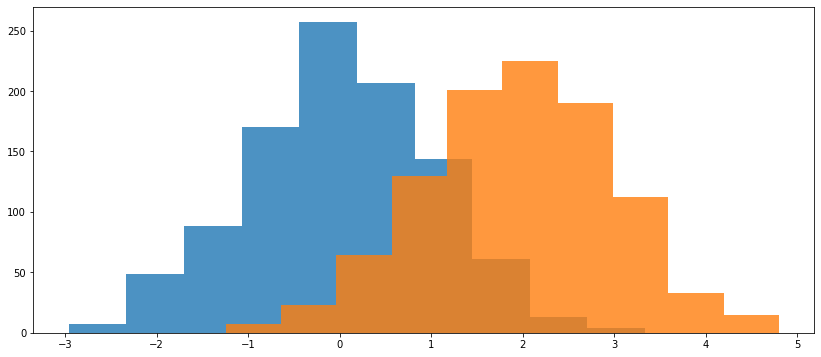

In [8]:
plt.figure(figsize=[14,6])
plt.hist(x1[y], alpha=0.8)
plt.hist(x1[~y], alpha=0.8)

In [10]:
#adding the second distribution

x2 = np.concatenate([np.random.randn(n//2), np.random.randn(n//2)+2])
y = np.array([True if i < n//2 else False for i in range(n)])

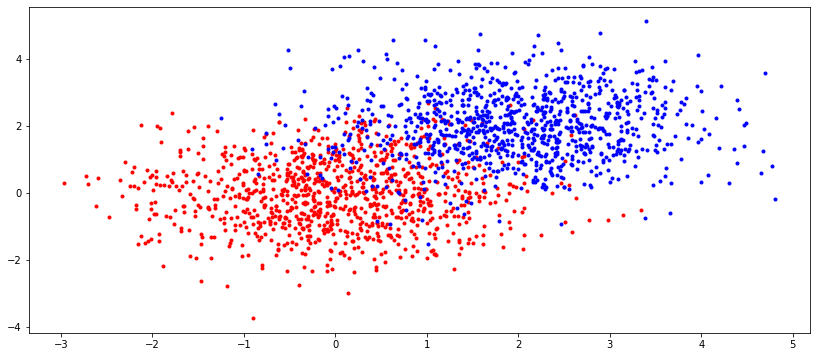

In [12]:
#plotting

plt.figure(figsize=[14,6])
plt.plot(x1[y] , x2[y], 'r.')
plt.plot(x1[~y], x2[~y], 'b.')


In [13]:
#combining distributions

np.vstack([x1,x2]).T

array([[ 2.50834361, -0.87430605],
       [ 0.07269656,  0.83091362],
       [-0.97612514,  0.08352703],
       ...,
       [ 2.54292674,  1.44560153],
       [ 1.73158715,  1.72105993],
       [ 2.7941522 ,  1.99521244]])

In [14]:
#constructing a Logistic Regressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
X_train, X_test, y_train, y_test = train_test_split(np.vstack([x1,x2]).T, y)

log_reg_1D = LogisticRegression(solver='lbfgs').fit(np.atleast_2d(X_train[:,0]).T, y_train)

log_reg_2D = LogisticRegression(solver='lbfgs').fit(X_train, y_train)



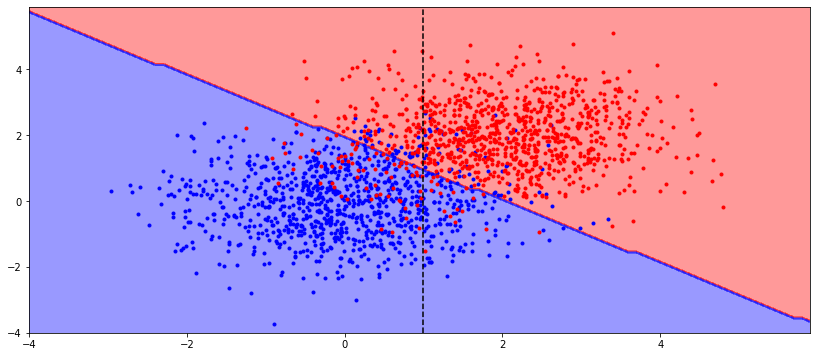

In [26]:
from matplotlib.colors import ListedColormap

xx1, xx2 = np.meshgrid(np.arange(-4, 6, .1), np.arange(-4, 6, .1))

Z = log_reg_2D.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

cut_1d = np.arange(-4, 6, .1)[log_reg_1D.predict_proba(np.atleast_2d(np.arange(-4,6,.1)).T)[:, 0] > .5][0]

colors = ('red', 'blue')
cmap = ListedColormap(colors)


plt.figure(figsize=[14,6])
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.plot(x1[y], x2[y], 'b.')
plt.plot(x1[~y], x2[~y], 'r.')
plt.axvline(cut_1d, color='k', linestyle='--');